In [125]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score,cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [126]:
df = pd.read_excel('../data/premiums.xlsx')
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


In [127]:
df.shape

(50000, 13)

In [128]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [129]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

Here we replace all the spaces into '_' and make all the col names in small or lower case

In [130]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [131]:
# Let see the persentage of missing data

df.isna().sum()/df.count()*100

age                      0.000000
gender                   0.000000
region                   0.000000
marital_status           0.000000
number_of_dependants     0.000000
bmi_category             0.000000
smoking_status           0.022005
employment_status        0.004000
income_level             0.026007
income_lakhs             0.000000
medical_history          0.000000
insurance_plan           0.000000
annual_premium_amount    0.000000
dtype: float64

as we can notice the percentage is very low we can drop those missing records

In [132]:
df.dropna(how='any',inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [133]:
df.duplicated().sum()

np.int64(0)

In [134]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [135]:
df[df['number_of_dependants']<0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
402,23,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Freelancer,10L - 25L,18,No Disease,Silver,9309
2245,18,Male,Southwest,Unmarried,-3,Overweight,No Smoking,Freelancer,25L - 40L,28,No Disease,Silver,8095
2323,19,Male,Northwest,Unmarried,-3,Underweight,No Smoking,Freelancer,25L - 40L,40,No Disease,Bronze,4641
2986,34,Female,Southeast,Married,-1,Underweight,Regular,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Silver,22995
3756,41,Male,Southwest,Married,-1,Obesity,Regular,Salaried,10L - 25L,21,Diabetes,Silver,22766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48062,23,Male,Northwest,Unmarried,-1,Normal,No Smoking,Freelancer,> 40L,54,No Disease,Gold,13601
48086,36,Female,Southwest,Married,-1,Obesity,Occasional,Salaried,<10L,3,Diabetes,Bronze,14422
49256,60,Female,Southwest,Married,-1,Normal,No Smoking,Self-Employed,10L - 25L,21,Thyroid,Bronze,10141
49270,34,Male,Southeast,Married,-1,Obesity,No Smoking,Self-Employed,10L - 25L,17,Diabetes & Thyroid,Silver,21816


In [136]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-3, -1])

In [137]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    49976.000000
mean         1.717284
std          1.491953
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49976 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    49976 non-null  int64 
 1   gender                 49976 non-null  object
 2   region                 49976 non-null  object
 3   marital_status         49976 non-null  object
 4   number_of_dependants   49976 non-null  int64 
 5   bmi_category           49976 non-null  object
 6   smoking_status         49976 non-null  object
 7   employment_status      49976 non-null  object
 8   income_level           49976 non-null  object
 9   income_lakhs           49976 non-null  int64 
 10  medical_history        49976 non-null  object
 11  insurance_plan         49976 non-null  object
 12  annual_premium_amount  49976 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.3+ MB


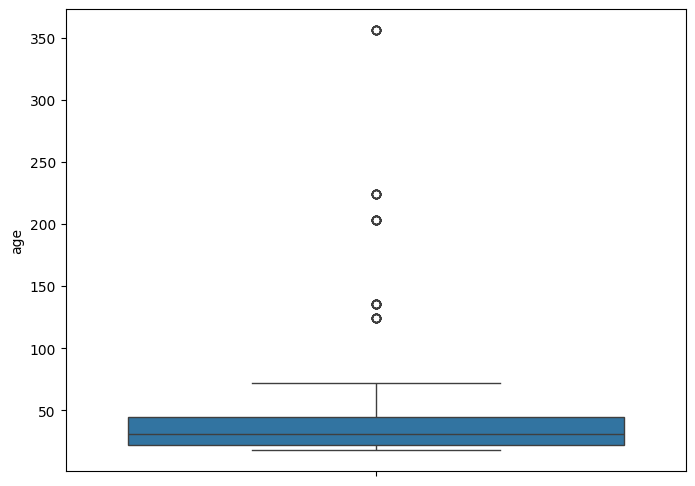

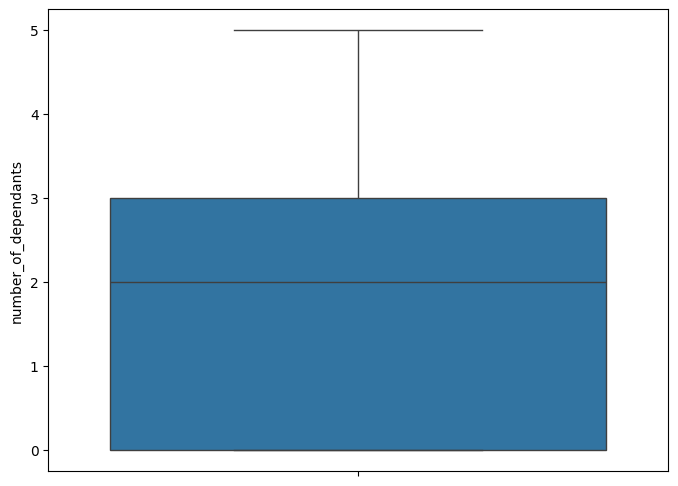

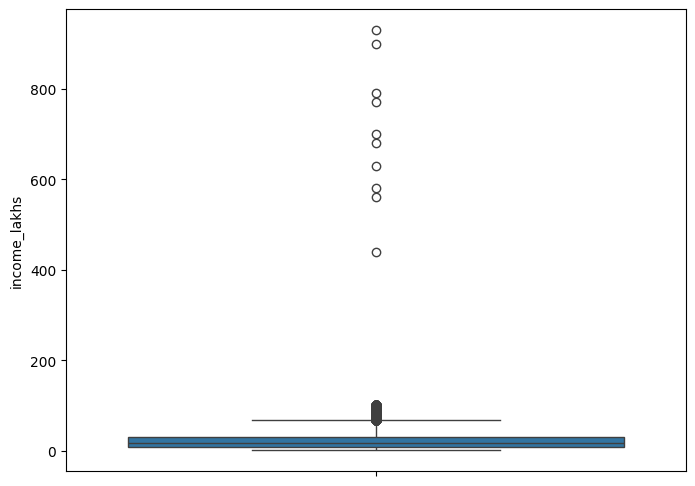

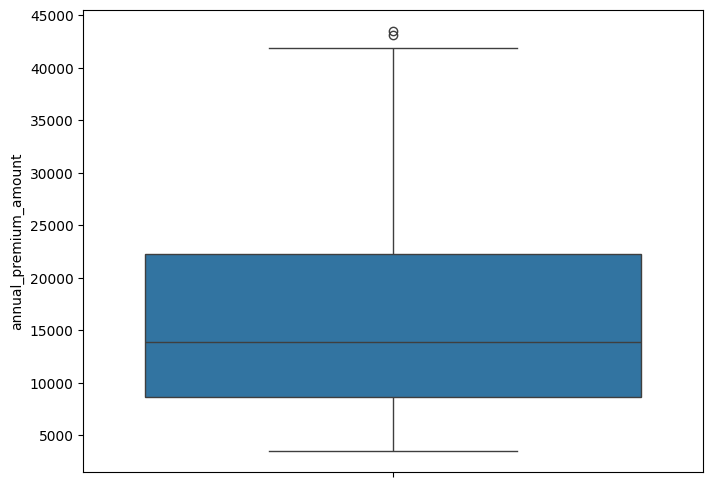

In [139]:
for i in df.columns:
    if df[i].dtype != 'object':
        plt.figure(figsize=(8,6))
        sns.boxplot(df[i])

In [140]:
num_feature = df.select_dtypes(exclude='object').columns
num_feature

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

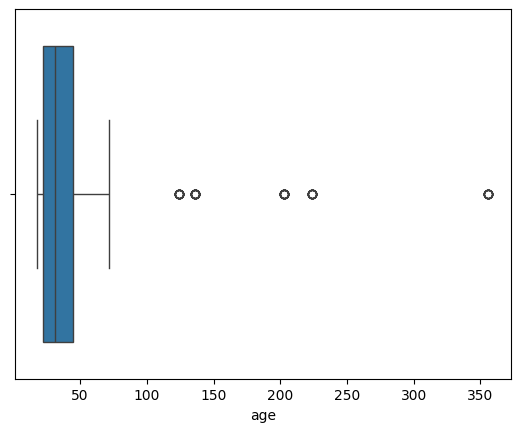

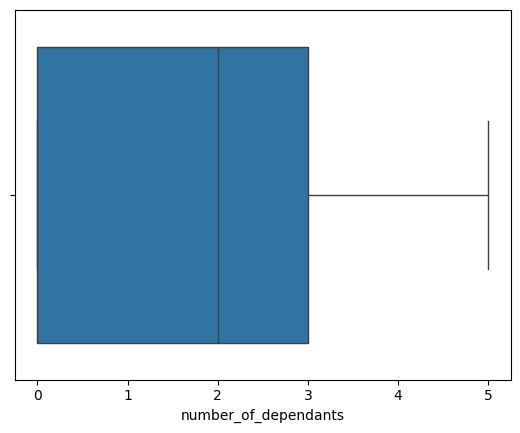

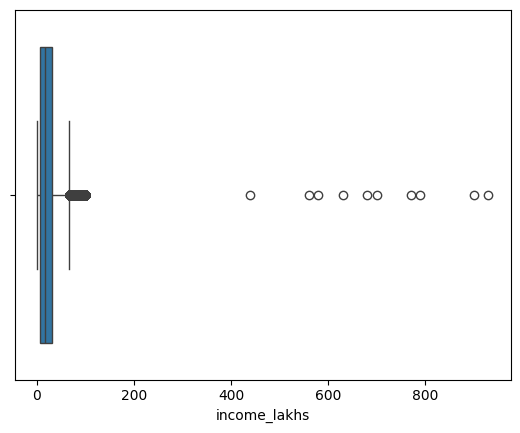

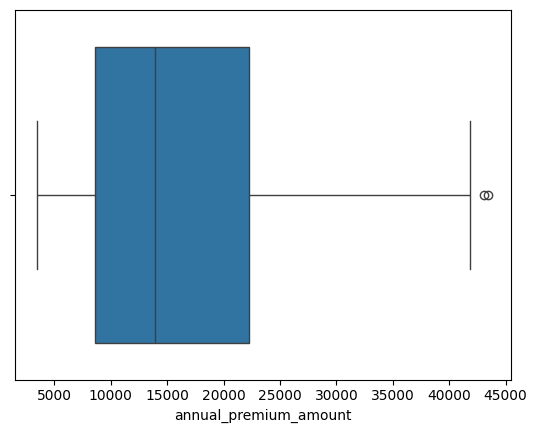

In [141]:
for i in num_feature:
    sns.boxplot(x=df[i])
    plt.show()

In [142]:
# outlier tretment for age

df[df['age']>100]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
114,224,Male,Northeast,Married,3,Normal,Regular,Salaried,25L - 40L,26,No Disease,Gold,27523
786,124,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,46,No Disease,Silver,11752
1298,124,Female,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,3,No Disease,Bronze,5311
1456,124,Female,Southwest,Unmarried,1,Overweight,No Smoking,Salaried,<10L,2,Diabetes,Bronze,10238
1470,136,Male,Southeast,Married,3,Overweight,Regular,Self-Employed,10L - 25L,15,High blood pressure,Gold,31913
1773,203,Female,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,<10L,6,Diabetes,Bronze,8762
3658,136,Male,Southwest,Married,2,Normal,Regular,Salaried,10L - 25L,20,Diabetes & Thyroid,Gold,31402
4246,203,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,18,No Disease,Bronze,5254
5699,124,Female,Southeast,Unmarried,1,Normal,No Smoking,Self-Employed,25L - 40L,29,No Disease,Silver,10265
5951,136,Male,Southwest,Married,3,Underweight,Regular,Self-Employed,<10L,2,Heart disease,Silver,26127


In [143]:
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356])

as we know it is highly unlikly to have age of a person will be around this [224, 124, 136, 203, 356] list so we are droping those records

In [144]:
df1 = df[df['age']<100].copy()
df1['age'].describe()

count    49918.000000
mean        34.401839
std         13.681600
min         18.000000
25%         22.000000
50%         31.000000
75%         45.000000
max         72.000000
Name: age, dtype: float64

<Axes: xlabel='income_lakhs', ylabel='Count'>

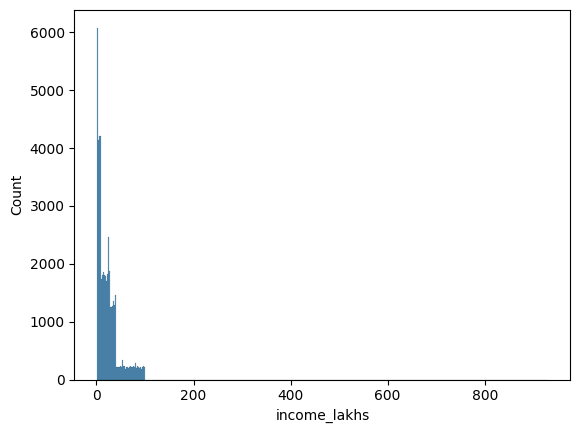

In [145]:
sns.histplot(df1['income_lakhs'])

In [146]:
def get_outliers(col):
    q1,q3 = col.quantile([0.25,0.95])
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr 
    return upper,lower

In [147]:
upper,lower = get_outliers(df1['income_lakhs'])

In [148]:
print(upper,lower)

182.0 -98.0


In [149]:
df1[df1['income_lakhs']>upper].shape

(10, 13)

In [150]:
df2 = df1[df1['income_lakhs']<upper]

In [151]:
df2['income_lakhs'].describe()

count    49908.000000
mean        22.889897
std         22.170699
min          1.000000
25%          7.000000
50%         17.000000
75%         31.000000
max        100.000000
Name: income_lakhs, dtype: float64

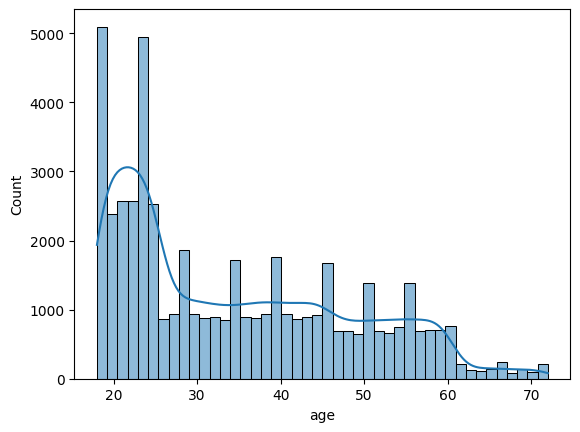

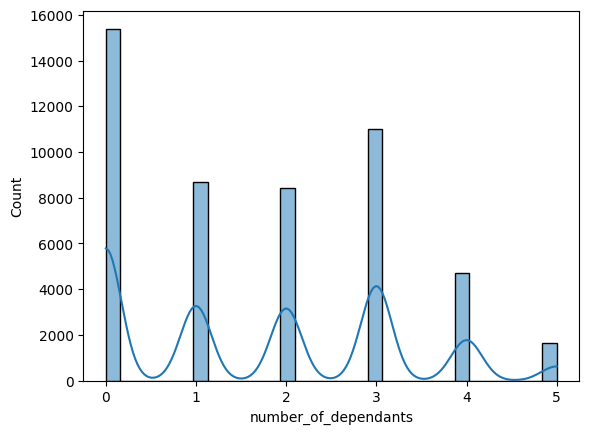

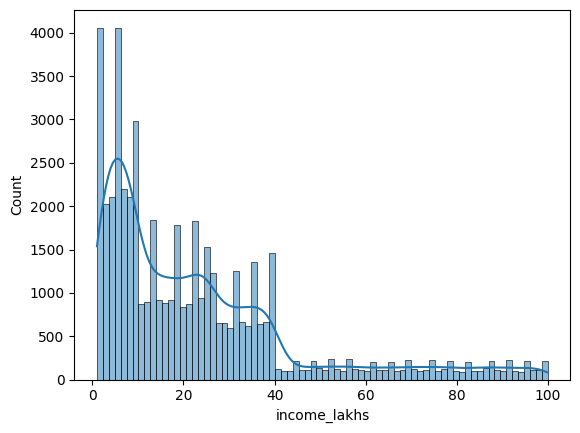

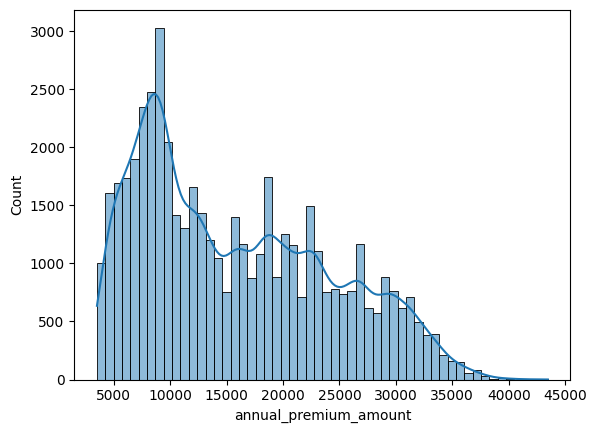

In [152]:
for i in df2.columns:
    if df2[i].dtype != 'object':
        sns.histplot(df2[i],kde=True)
        plt.show()

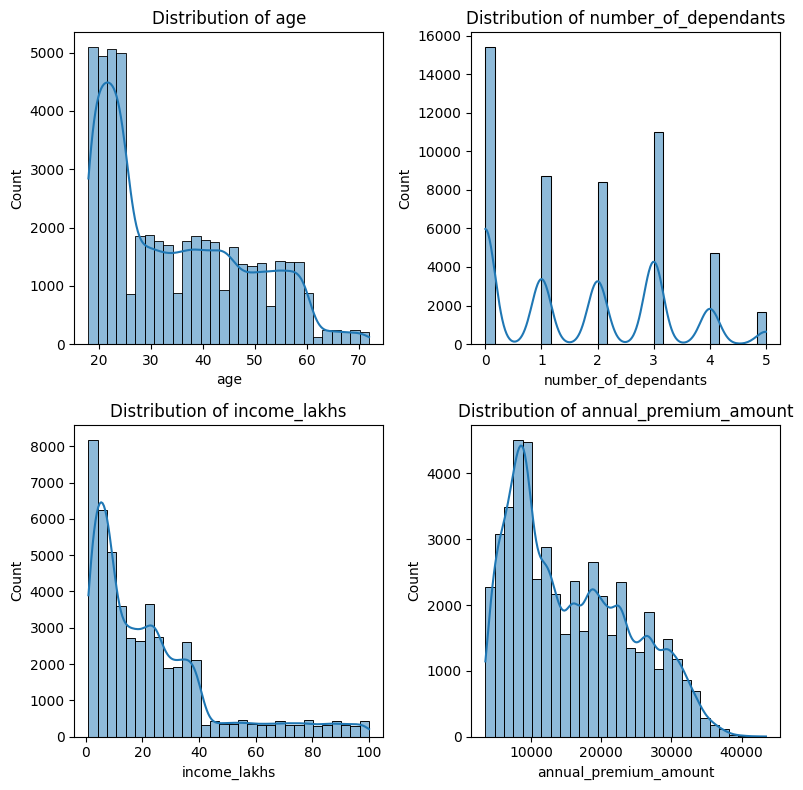

In [153]:
# Select numeric columns
num_cols = [col for col in df2.columns if df2[col].dtype != 'object']

# Define number of columns per row
n_cols = 2
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(8, 4 * n_rows))

for idx, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(df2[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

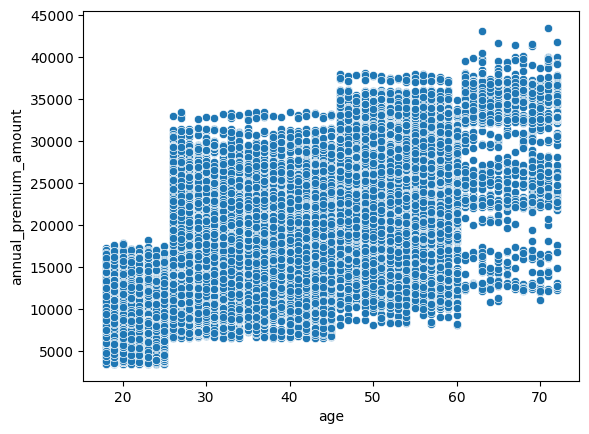

In [154]:
sns.scatterplot(df2,x='age',y='annual_premium_amount')

<Axes: xlabel='age', ylabel='income_lakhs'>

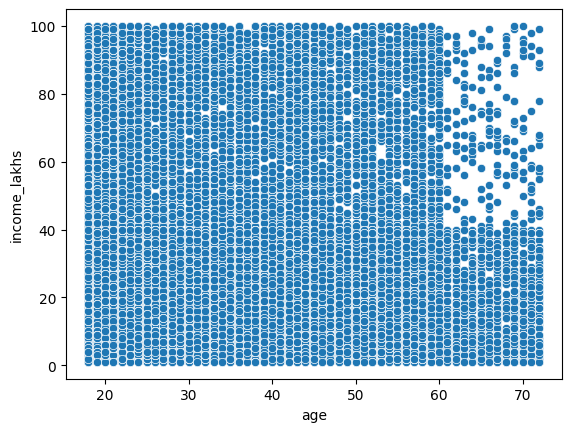

In [155]:
sns.scatterplot(df2,x='age',y='income_lakhs')

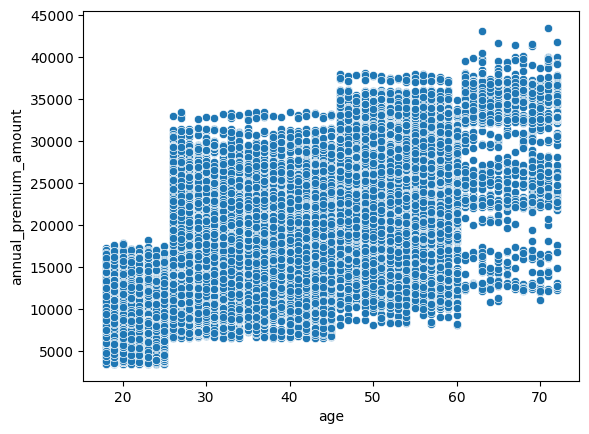

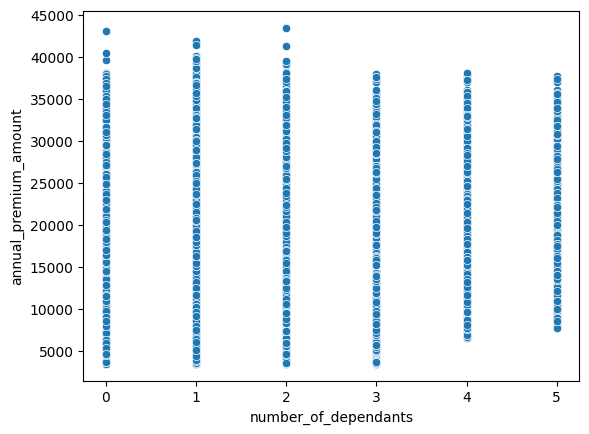

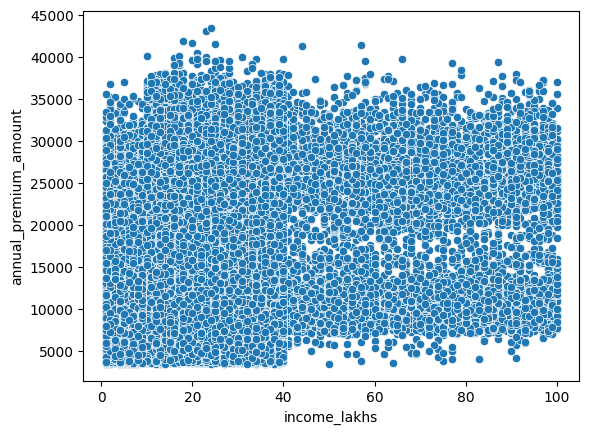

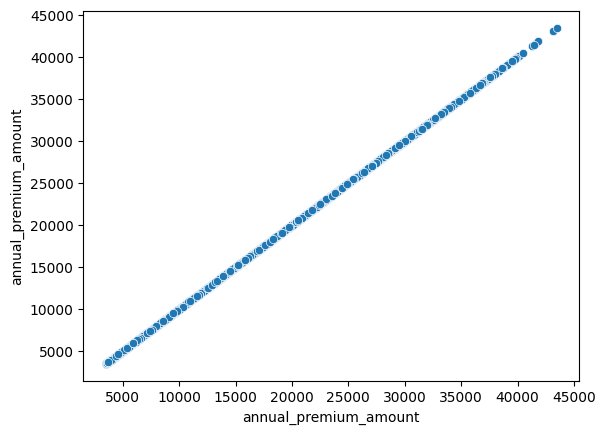

In [156]:
for i in df2.columns:
    if df2[i].dtype != 'object':
        sns.scatterplot(df2,x=i,y='annual_premium_amount')
        plt.show()

In [157]:
cat_features = df2.select_dtypes(include='object').columns
for i in cat_features:
    print(i, ":",df2[i].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [158]:
df2['smoking_status'].replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking'
},inplace=True)

In [159]:
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

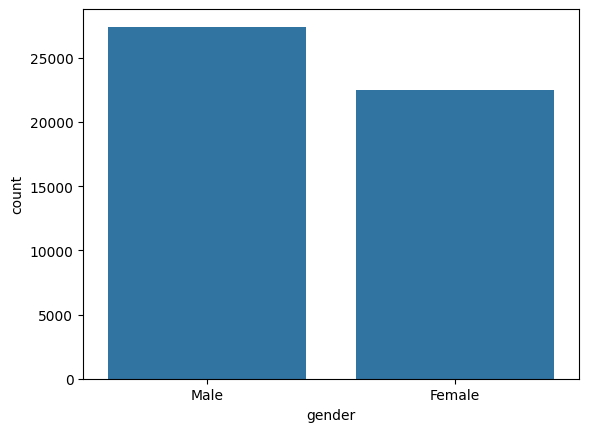

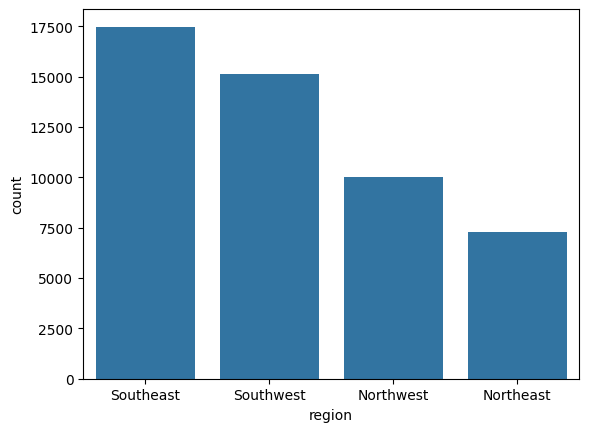

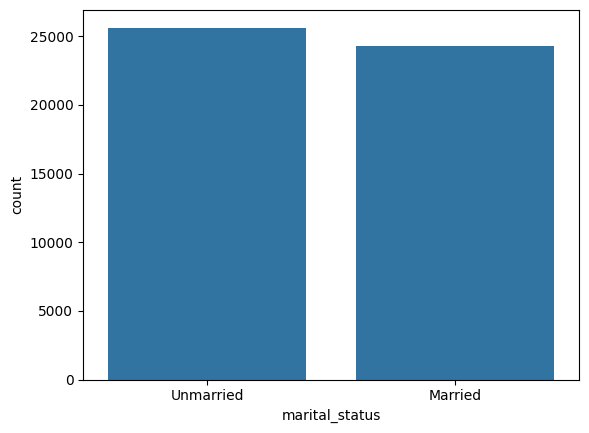

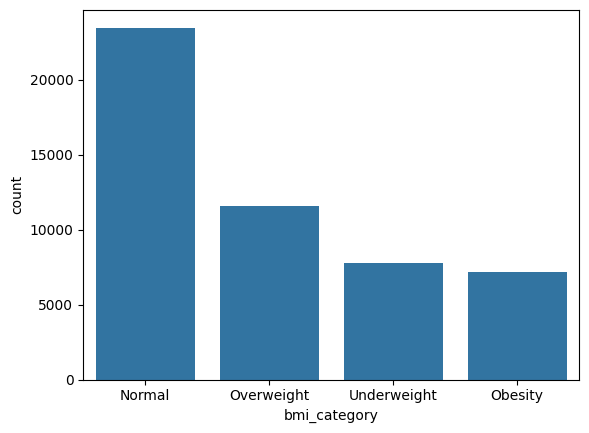

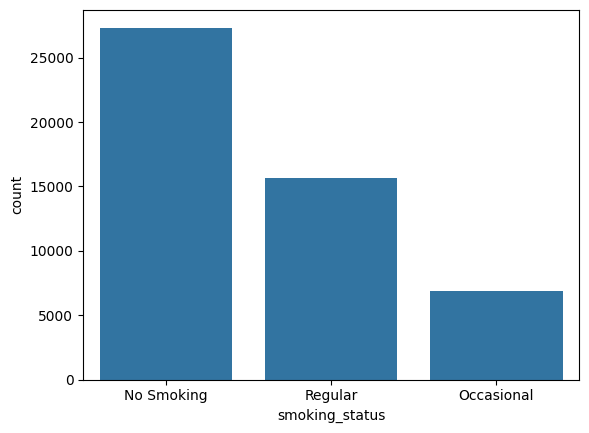

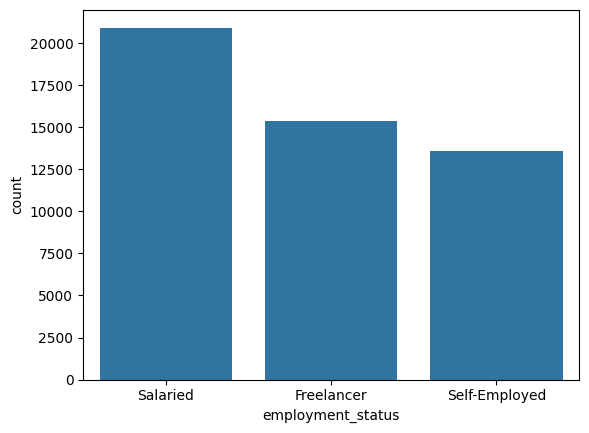

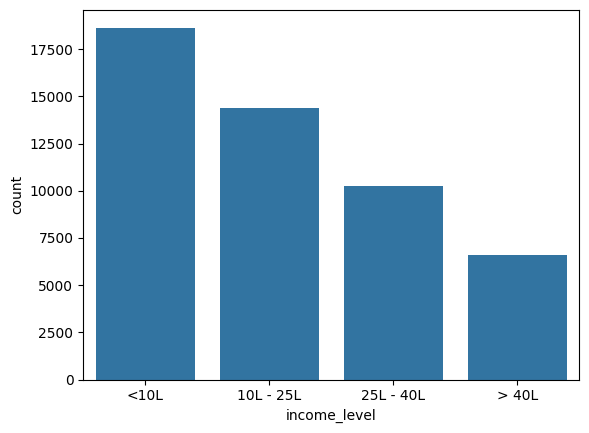

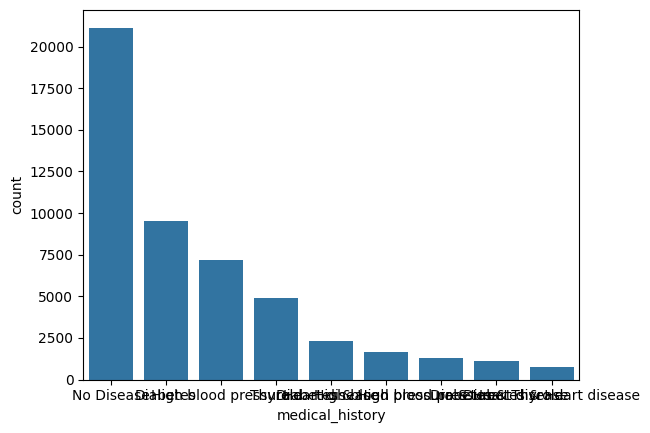

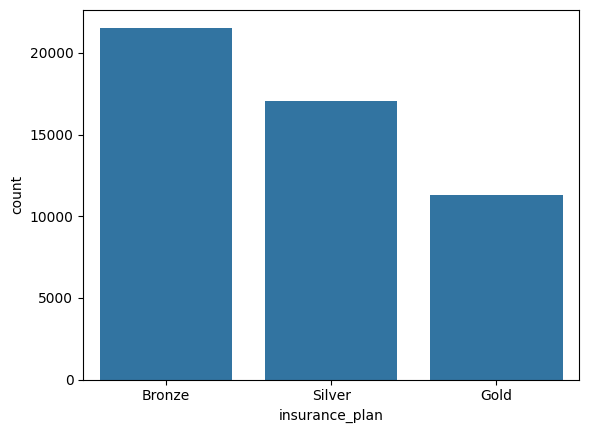

In [160]:
for i in cat_features:
    sns.barplot(df2[i].value_counts())
    plt.show()

In [161]:
for i in cat_features:
    print(df2[i].value_counts(normalize=True))

gender
Male      0.549631
Female    0.450369
Name: proportion, dtype: float64
region
Southeast    0.350385
Southwest    0.303038
Northwest    0.200930
Northeast    0.145648
Name: proportion, dtype: float64
marital_status
Unmarried    0.513545
Married      0.486455
Name: proportion, dtype: float64
bmi_category
Normal         0.470245
Overweight     0.231245
Underweight    0.155326
Obesity        0.143183
Name: proportion, dtype: float64
smoking_status
No Smoking    0.547868
Regular       0.313857
Occasional    0.138274
Name: proportion, dtype: float64
employment_status
Salaried         0.419412
Freelancer       0.308548
Self-Employed    0.272041
Name: proportion, dtype: float64
income_level
<10L         0.373547
10L - 25L    0.287910
25L - 40L    0.205839
> 40L        0.132704
Name: proportion, dtype: float64
medical_history
No Disease                             0.423539
Diabetes                               0.191011
High blood pressure                    0.144446
Thyroid             

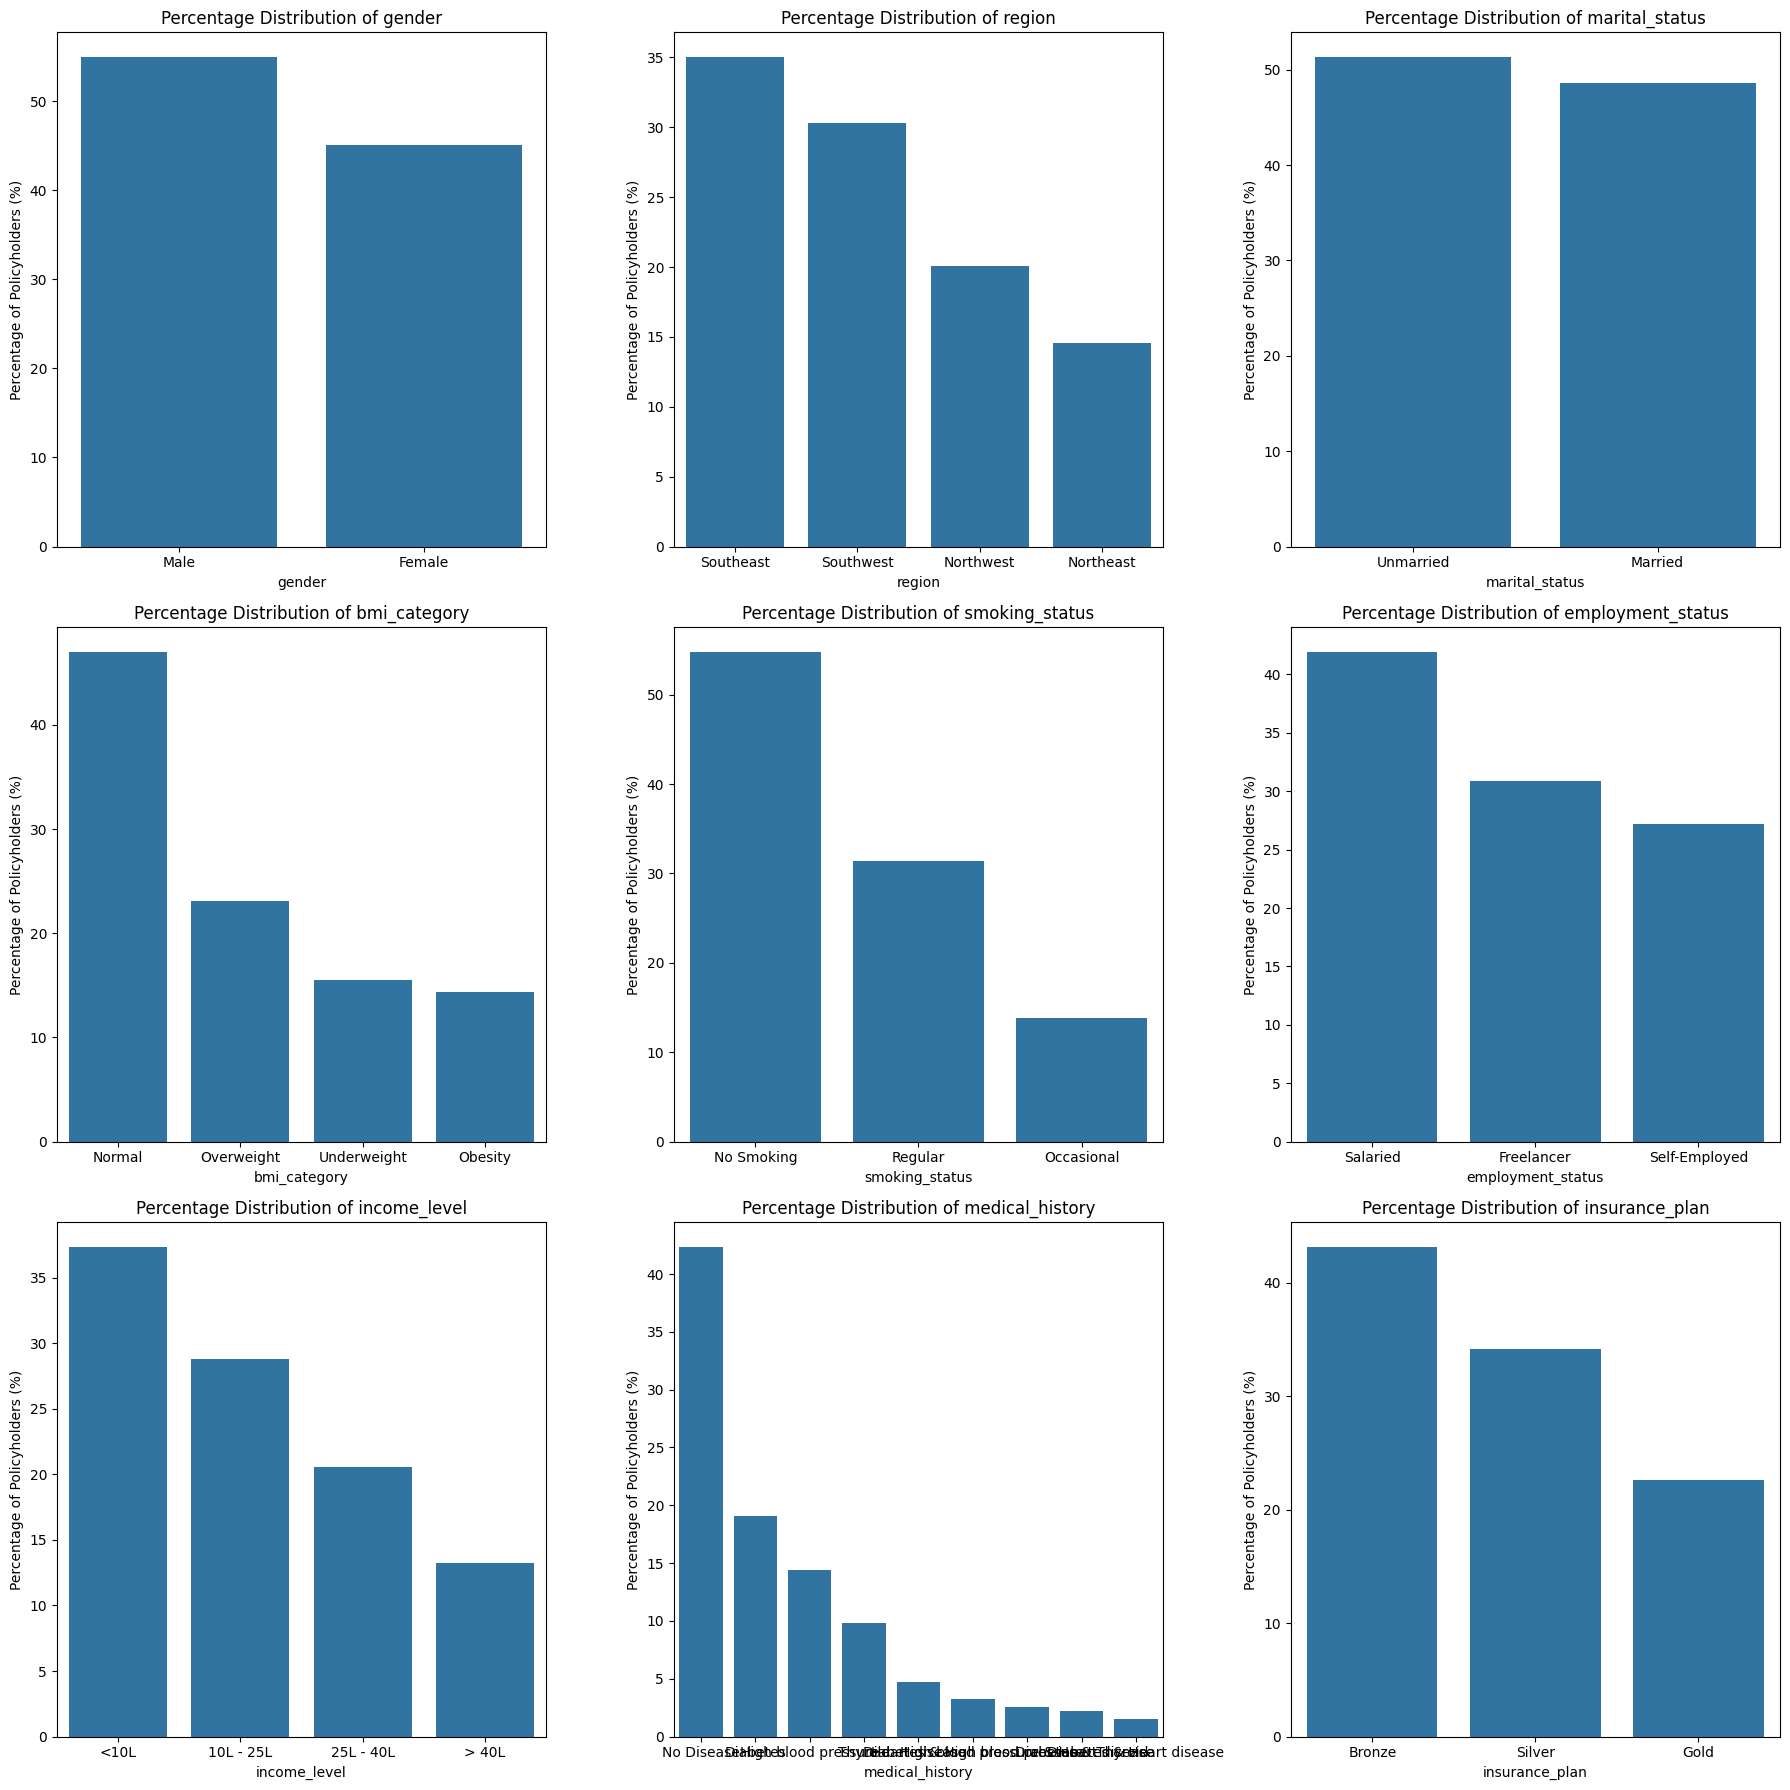

In [162]:
fig,axes = plt.subplots(3,3,figsize=(18,18))
axes = axes.flatten()

for ax,col in zip(axes,cat_features):
    cat_count = df2[col].value_counts(normalize=True)*100
    
    sns.barplot(x=cat_count.index,y=cat_count.values,ax=ax)
    ax.set_title(f'Percentage Distribution of {col}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(col)
    
plt.tight_layout()
plt.show()

In [163]:
tab = pd.crosstab(df2['income_level'],df2['insurance_plan'])
tab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,5307,3880,5182
25L - 40L,3683,2840,3750
<10L,12226,931,5486
> 40L,329,3653,2641


<Axes: xlabel='income_level'>

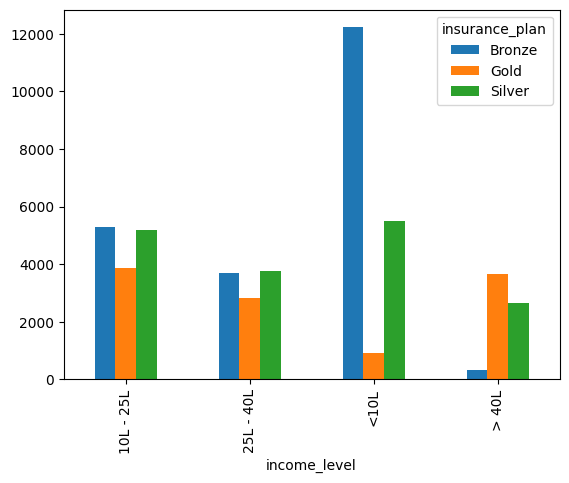

In [164]:
tab.plot(kind='bar')

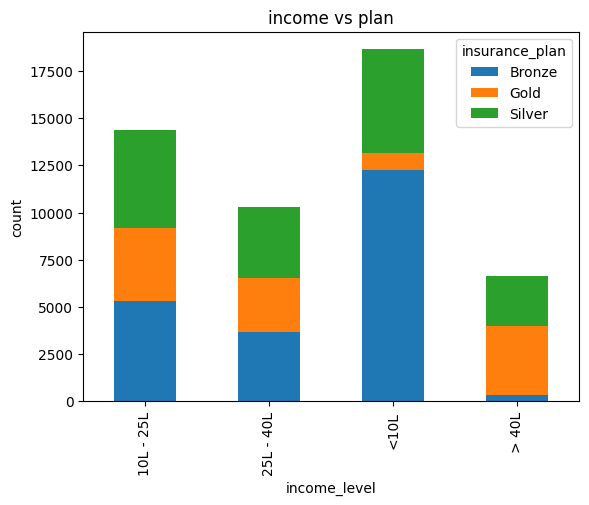

In [165]:
tab.plot(kind='bar',stacked=True)
plt.title('income vs plan')
plt.ylabel('count')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

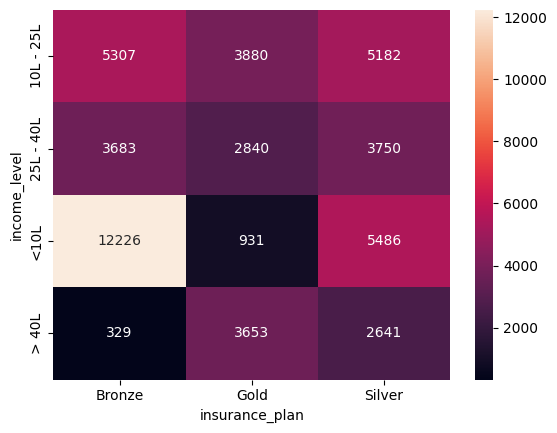

In [166]:
sns.heatmap(tab,annot=True,fmt='d')

In [167]:
df2['medical_history'].unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [168]:
# as per business we have a risk score

risk_score ={
    'diabetes':6,
    'heart disease':8,
    'high blood pressure':6,
    'thyroid':5,
    'no disease':0,
    'none':0
}

In [169]:
df2[['disease1','disease2']] = df2['medical_history'].str.split(' & ',expand=True).apply(lambda x: x.str.lower())
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,None
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,None
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,None


In [170]:
df2['disease1'].fillna('none',inplace=True)
df2['disease2'].fillna('none',inplace=True)

In [171]:
df2['total_risk_score'] = 0

for x in ['disease1','disease2']:
    df2['total_risk_score'] += df2[x].map(risk_score)

In [172]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6


In [173]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,total_risk_score
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641,4.085638
std,13.681604,1.492032,22.170699,8418.674061,4.023878
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,22.000000,0.000000,7.000000,8608.000000,0.000000
50%,31.000000,2.000000,17.000000,13928.000000,5.000000
75%,45.000000,3.000000,31.000000,22270.500000,6.000000
max,72.000000,5.000000,100.000000,43471.000000,14.000000


In [174]:
# drop redandant col

df2.drop(columns=['medical_history','disease1', 'disease2'],axis=1,inplace=True)

In [175]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,insurance_plan,annual_premium_amount,total_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Bronze,9053,6
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Bronze,16339,6
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,Silver,18164,6
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,Gold,20303,0
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,Silver,13365,6


In [176]:
num_feature = df2.select_dtypes(exclude='object').columns
cat_features = df2.select_dtypes(include='object').columns

In [177]:
cat_features

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'insurance_plan'],
      dtype='object')

In [178]:
nominal_cat_feature = ['gender','region', 'marital_status', 'bmi_category', 'smoking_status','employment_status'] #onehot
odinal_cat_feature = ['income_level', 'insurance_plan'] #odinal lable

In [179]:
num_feature

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'total_risk_score'],
      dtype='object')

In [180]:
nominal_feature = ['age','number_of_dependants','income_lakhs'] # standard
odinal_num_feature = ['total_risk_score'] # minmax 'income_level', 'insurance_plan'

In [181]:
odinal_pip = Pipeline([
    ('OrdinalEncoder',OrdinalEncoder()),
    ('scale',MinMaxScaler())
])

In [182]:
transf = ColumnTransformer(
    [
        ('OneHotEncoder',OneHotEncoder(drop='first'),nominal_cat_feature),
        ('OrdinalEncoder_scale',odinal_pip,odinal_cat_feature),
        ('StandardScaler',StandardScaler(),nominal_feature),
        ('MinMaxScaler',MinMaxScaler(),odinal_num_feature)
    ],
)
transf

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 ['gender', 'region', 'marital_status',
                                  'bmi_category', 'smoking_status',
                                  'employment_status']),
                                ('OrdinalEncoder_scale',
                                 Pipeline(steps=[('OrdinalEncoder',
                                                  OrdinalEncoder()),
                                                 ('scale', MinMaxScaler())]),
                                 ['income_level', 'insurance_plan']),
                                ('StandardScaler', StandardScaler(),
                                 ['age', 'number_of_dependants',
                                  'income_lakhs']),
                                ('MinMaxScaler', MinMaxScaler(),
                                 ['total_risk_score'])])

In [183]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,insurance_plan,annual_premium_amount,total_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Bronze,9053,6
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Bronze,16339,6
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,Silver,18164,6
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,Gold,20303,0
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,Silver,13365,6


In [184]:
x = df2.drop('annual_premium_amount',axis=1)
y = df2['annual_premium_amount']

In [185]:
x_transf1 = transf.fit_transform(x)
x_transf1

array([[ 1.        ,  1.        ,  0.        , ..., -1.15122015,
        -0.7618193 ,  0.42857143],
       [ 0.        ,  0.        ,  1.        , ...,  0.18924682,
        -0.7618193 ,  0.42857143],
       [ 0.        ,  0.        ,  0.        , ...,  0.18924682,
        -0.1303489 ,  0.42857143],
       ...,
       [ 1.        ,  1.        ,  0.        , ..., -1.15122015,
         0.41091144,  0.        ],
       [ 1.        ,  1.        ,  0.        , ...,  0.18924682,
        -0.1303489 ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.8594803 ,
        -0.71671427,  0.42857143]], shape=(49908, 18))

In [186]:
dfnew = pd.DataFrame(x_transf1)

In [187]:
dfnew

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.666667,0.0,-0.614085,-1.151220,-0.761819,0.428571
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.666667,0.0,-0.394810,0.189247,-0.761819,0.428571
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,1.067022,0.189247,-0.130349,0.428571
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.5,-0.321718,0.859480,2.440638,0.000000
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.000000,1.0,-1.198817,-1.151220,3.432948,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49903,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.333333,0.0,-0.760268,-1.151220,0.546227,0.000000
49904,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.5,0.920838,0.189247,2.666163,0.357143
49905,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.0,-0.979543,-1.151220,0.410911,0.000000
49906,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,-1.198817,0.189247,-0.130349,0.000000
